<center><h1> Assignment 03: Decision Trees </h1>
<h3> Marina Orzechowski </h3></center>

<br><p>In this assignment we need to demonstrate the learning process of a rhombus using decision trees in scikit-learn library.<br><br>
In our example the rhombus has interior angles of 45° and 135°, the left bottom vertex of the rhombus has coordinates (0.2, 0.7) and the side of the rhombus is 1.</p>

<h3>Features: x, y</h3>

In [1]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np 
import graphviz
import math
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [2]:
# generate points with random coordinates in the interval [0, 2). 
# for points inside the rhombus, y=1 and for points outside the rhombus, y=0.

npts = 10000

X1 = np.zeros((npts,2))
y1 = np.zeros(npts)
rhombus_height = math.sin(math.radians(45))
for i in range(0,npts): 
    X1[i,0] = np.random.uniform(0.0,2.0) 
    X1[i,1] = np.random.uniform(0.0,2.0) 
    if ((X1[i,0]<0.2) or (X1[i,0]>1.2+rhombus_height) or (X1[i,1]<0.7) or (X1[i,1]>0.7+rhombus_height)
       or (X1[i,0]<0.2+rhombus_height and X1[i,1]>X1[i,0]+0.5) or (X1[i,0]>1.2 and X1[i,1]<X1[i,0]-0.55)):
        y1[i] = 0
    else:
        y1[i] = 1

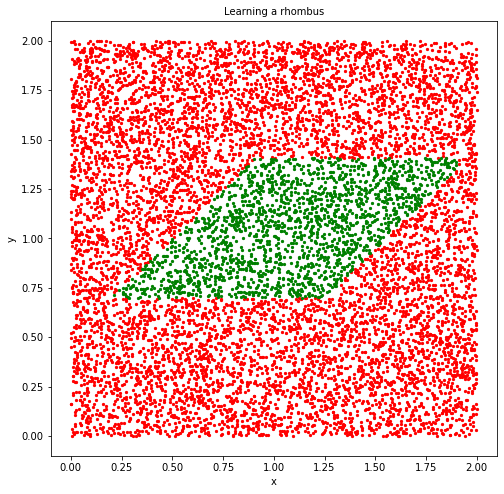

In [3]:
# plot data points
def plot_data_points(title, inner_points_x, inner_points_y, outer_points_x, outer_points_y, lim):
    plt.close('all')
    plt.figure(figsize=(8, 8))
    plt.title(title, fontsize='medium')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x = inner_points_x, y = inner_points_y, color='red', label='0', s=5)
    plt.scatter(x = outer_points_x, y = outer_points_y, color='green', label='1', s=5)
    plt.axis(range=1, aspect=1)
    plt.xlim(lim)
    plt.ylim(lim)
    plt.show()
    
plot_data_points('Learning a rhombus', X1[y1==0, 0], X1[y1==0, 1], X1[y1==1, 0], X1[y1==1, 1], {-0.1,2.1})

In [4]:
# split data into 50% training and 50% test data

X1_train, X1_test, y1_train, y1_test = train_test_split(
         X1, y1, test_size=0.50, random_state=0)

In [5]:
# Fit for various depth trees
MaxDepth = 10

def fit_for_var_depth_trees (train_X, train_y, test_X, test_y):
    Errors = np.zeros((MaxDepth,2))
    print ("{:^20}{:^20}{:^20}".format('Max Depth','Training','Test'))

    for i in range(0,MaxDepth):
        tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
        tree.fit(train_X, train_y)

        combined_X = np.vstack((train_X, test_X))
        combined_y = np.hstack((train_y, test_y))

        # optional outputs
        z = tree.apply(combined_X)
        dp = tree.decision_path(combined_X)

        # tree.score returns the mean accuracy on the given test data and labels 
        # find errors
        Errors[i,0] = 1 - tree.score(train_X,train_y)
        Errors[i,1] = 1 - tree.score(test_X,test_y)
        print("{:^20d}{:^20f}{:^20f}".format(i+1, Errors[i,0], Errors[i,1]))
    return Errors, tree
    
Errors, tree = fit_for_var_depth_trees (X1_train, y1_train, X1_test, y1_test) 

     Max Depth            Training              Test        
         1                0.194600            0.189600      
         2                0.165000            0.161600      
         3                0.098600            0.099600      
         4                0.065600            0.063600      
         5                0.050800            0.050800      
         6                0.030000            0.035000      
         7                0.013000            0.021400      
         8                0.007200            0.013000      
         9                0.002600            0.007600      
         10               0.001200            0.007000      


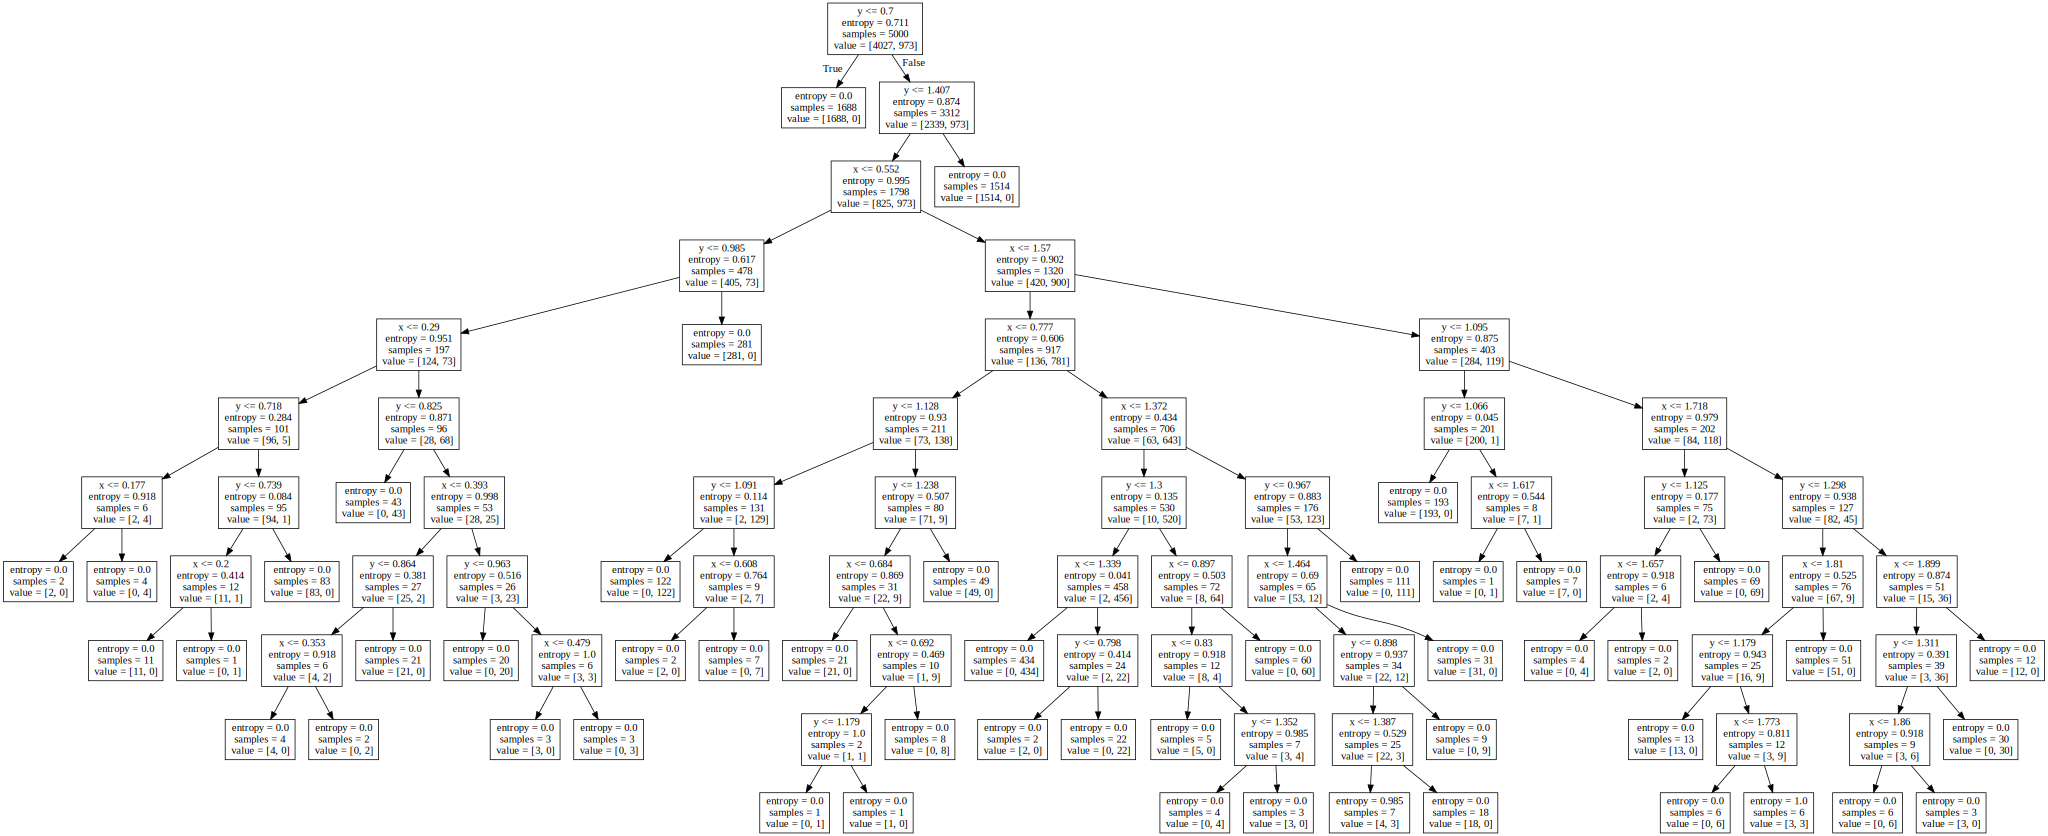

In [6]:
# plot the final decision tree
export_graphviz(tree, out_file='T1.dot', feature_names=['x','y'])
with open('T1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

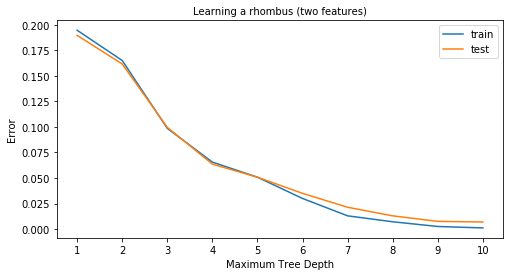

In [7]:
# plot errors by tree depth    
def plot_errors_by_tree_depth(title, Errors):
    plt.close('all')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
    ax.set_xlabel('Maximum Tree Depth')
    ax.set_ylabel('Error')
    ax.set_title(title, fontsize ='medium')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
    ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
    ax.legend(loc='upper right', fontsize='medium')
    plt.show() 
    
plot_errors_by_tree_depth('Learning a rhombus (two features)', Errors)

<h3>Features: x, y, x - y</h3>

In [38]:
# generate points with random coordinates in the interval [0, 2). 
# for points inside the rhombus, y=1 and for points outside the rhombus, y=0.

npts = 10000

X2 = np.zeros((npts,3))
y2 = np.zeros(npts)
rhombus_height = math.sin(math.radians(45))
for i in range(0,npts): 
    X2[i,0] = np.random.uniform(0.0,2.0) 
    X2[i,1] = np.random.uniform(0.0,2.0) 
    X2[i,2] = X2[i,0] - X2[i,1]
    
    if ((X2[i,0]<0.2) or (X2[i,0]>1.2+rhombus_height) or (X2[i,1]<0.7) or (X2[i,1]>0.7+rhombus_height)
       or (X2[i,0]<0.2+rhombus_height and X2[i,1]>X2[i,0]+0.5) or (X2[i,0]>1.2 and X2[i,1]<X2[i,0]-0.55)):
        y2[i] = 0
    else:
        y2[i] = 1

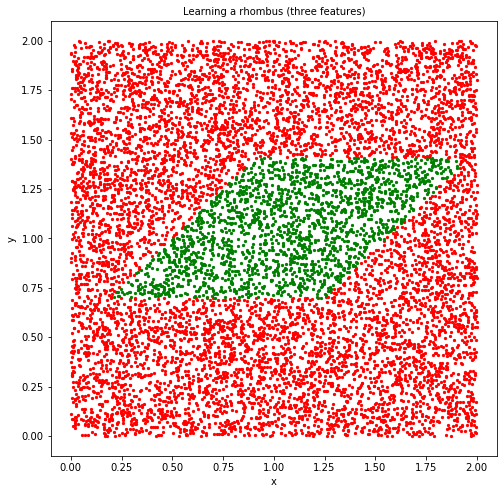

In [39]:
plot_data_points('Learning a rhombus (three features)', X2[y2==0, 0], X2[y2==0, 1], X2[y2==1, 0], X2[y2==1, 1], {-0.1,2.1})

In [40]:
# split data into 50% training and 50% test data

X2_train, X2_test, y2_train, y2_test = train_test_split(
         X2, y2, test_size=0.50, random_state=0)

In [41]:
Errors, tree = fit_for_var_depth_trees (X2_train, y2_train, X2_test, y2_test) 

     Max Depth            Training              Test        
         1                0.190000            0.202800      
         2                0.167000            0.169600      
         3                0.068000            0.069800      
         4                0.000400            0.000800      
         5                0.000000            0.000200      
         6                0.000000            0.000200      
         7                0.000000            0.000200      
         8                0.000000            0.000200      
         9                0.000000            0.000200      
         10               0.000000            0.000200      


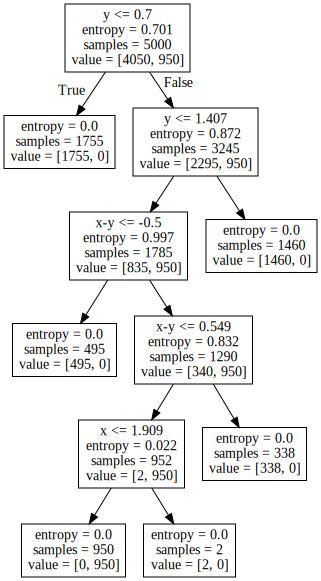

In [42]:
# plot the final decision tree
export_graphviz(tree, out_file='T2.dot', feature_names=['x','y','x-y'])
with open('T2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

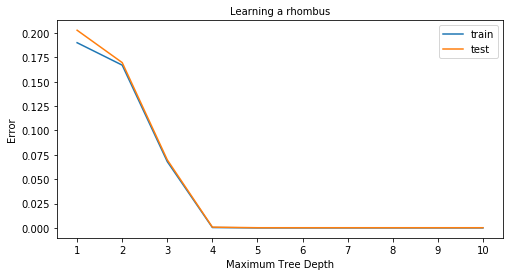

In [43]:
plot_errors_by_tree_depth('Learning a rhombus', Errors)

<h3>Features: x, y, x - y, x + y </h3>

In [44]:
# generate points with random coordinates in the interval [0, 2). 
# for points inside the rhombus, y=1 and for points outside the rhombus, y=0.

npts = 10000

X3 = np.zeros((npts,4))
y3 = np.zeros(npts)
rhombus_height = math.sin(math.radians(45))
for i in range(0,npts): 
    X3[i,0] = np.random.uniform(0.0,2.0) 
    X3[i,1] = np.random.uniform(0.0,2.0) 
    X3[i,2] = X3[i,0] - X3[i,1]
    X3[i,3] = X3[i,0] + X3[i,1]
    
    if ((X3[i,0]<0.2) or (X3[i,0]>1.2+rhombus_height) or (X3[i,1]<0.7) or (X3[i,1]>0.7+rhombus_height)
       or (X3[i,0]<0.2+rhombus_height and X3[i,1]>X3[i,0]+0.5) or (X3[i,0]>1.2 and X3[i,1]<X3[i,0]-0.55)):
        y3[i] = 0
    else:
        y3[i] = 1

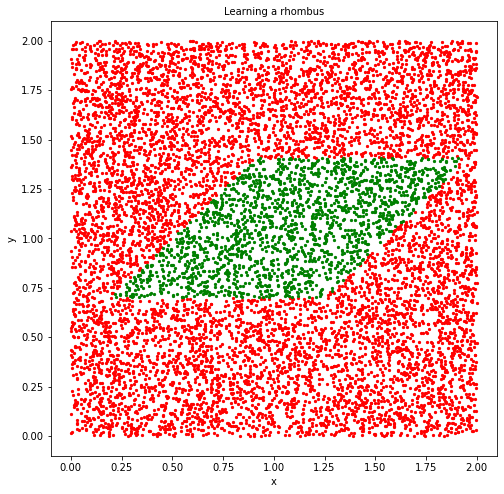

In [45]:
plot_data_points('Learning a rhombus', X3[y3==0, 0], X3[y3==0, 1], X3[y3==1, 0], X3[y3==1, 1], {-0.1,2.1})

In [46]:
# split data into 50% training and 50% test data

X3_train, X3_test, y3_train, y3_test = train_test_split(
         X3, y3, test_size=0.50, random_state=0)

In [47]:
Errors, tree = fit_for_var_depth_trees (X3_train, y3_train, X3_test, y3_test) 

     Max Depth            Training              Test        
         1                0.177600            0.189000      
         2                0.168800            0.175400      
         3                0.064600            0.077000      
         4                0.000200            0.001200      
         5                0.000000            0.000800      
         6                0.000000            0.000800      
         7                0.000000            0.000800      
         8                0.000000            0.000800      
         9                0.000000            0.000800      
         10               0.000000            0.000800      


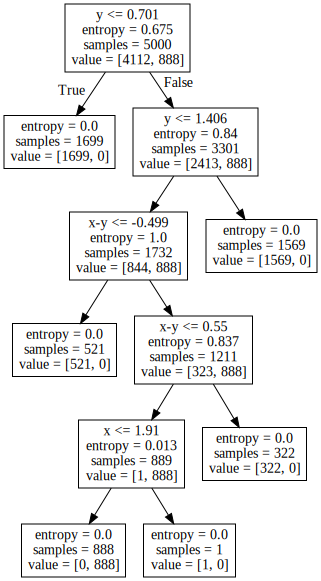

In [48]:
# plot the final decision tree
export_graphviz(tree, out_file='T3.dot', feature_names=['x','y', 'x-y', 'x+y'])
with open('T3.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

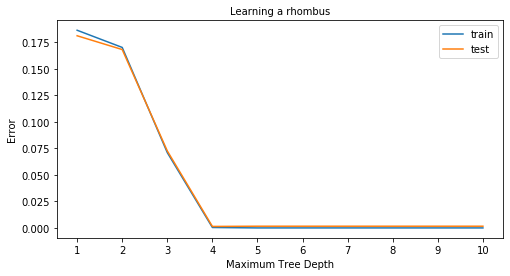

In [31]:
plot_errors_by_tree_depth('Learning a rhombus', Errors)

<h3>Discussion</h3><br>
In order to build a decision tree, we need to decide what questions to ask and in what order.   
Ideally, we need to choose questions whose answers give a lot of information about what the tree should predict. Because it is not feasible to check all the possible orders of the questions (all possible trees) we use a greedy algorithm. At each stage we make a locally optimal choice. <br><br>
We split the tree on the feature that results in the largest information gain. Scikit-learn helps us with this task and chooses the best feature out of the given options. Therefore, our task is to come up with a good list of features, so at each stage scikit-learn can choose the best one. <br><br>
We can see that learning the rhombus using only two features x and y is not accurate enough. The test error very slowely decreases and reaches 0.007 at the depth 10 of the tree.<br><br>
When we add the third feature x-y the speed of the test error line approching zero increases tremendously. We don't need a tree of depth 10, as at level 4 the error ~0 and every leaf has zero entropy. Therefore there will be no uncertainty and all the data at this level belongs to a single class.<br><br>
Adding the fours feature x+y doesn't really improves the accuracy, as this feature gets chosen only once during the tree splitting.<br><br>
So, I noticed that adding feature x - y improved perfomance of the algorithm more than adding any other feature. Adding other features as a third feature didn't really change performance of the algorithm. I added this feature only because it is close to the rhombus sides' equation (because in the example code the circle equation was used for the learning circle). But I don't completely understand how to choose features: is there a logic or is it completely arbitrary? Its mentioned in the lecture slides that features engineering is useful. Would be great to learn about<br><br>
The fact is that creating new features from the data we have available can drastically improve the predictive power.
